# Proyecto final
## Alineamiento de secuencias e información mutua entre el gen mitocondrial humano y animales compatibles

In [ ]:
import re
from sklearn.metrics import normalized_mutual_info_score
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd

Para comparar la similitud entre secuencias usaremos el algoritmo de la Entropía de Shannon. Para usarlo, las secuencias deben ser del mismo tamaño. Como en un inicio los distintos genes mitocondriales no tienen la misma longitud utilizamos la siguiente [página](https://www.ebi.ac.uk/Tools/psa/emboss_stretcher/) para alinearlos.

### Implementación de la fórmula de la Entropia mutua de Shannon

In [ ]:
def entropia(X, base = 2):
    conteo = Counter(X)
    T = np.sum(list(conteo.values()))
    P = {}
    for simbolo in conteo:
        P[simbolo] = conteo[simbolo] / T
    H = 0.0
    for val in P:
        H += np.log(P[val]) + P[val]
    
    return -H/np.log(base)

In [ ]:
def mi(X, Y, base):
    C = genera_conj(X, Y)

    Hx = entropia(X, base = base)
    Hy = entropia(Y, base = base)
    Hxy = conjunta(C, set(X), set(Y), base = base)
    
    return Hx + Hy -Hxy

In [ ]:
def conjunta(C, X, Y, base = 2):
    Xsimb, Ysimb = X, Y
    l = list([(x,y) for x in Xsimb for y in Ysimb])
    z = [0]*len(l)
    conteos = dict(zip(l,z))
    cc = Counter(C)
    for c in cc:
        conteos[c] = cc[c]
    T = np.sum(list(conteos.values()))
    P = {}
    for simbolo in conteos:
        P[simbolo] = conteos[simbolo] /T
        
    H = 0.0
    for val in P:
        H += 0 if P[val] == 0 else np.log(P[val])*P[val]
    return -H/np.log(base)

In [ ]:
def genera_conj(X, Y):
    C = ((x,y) for x in X for y in Y)
    return C

### Implementación del algoritmo de información mutua

In [ ]:
def  mutua(secuencia1):
    #generamos las probas de la secuencia
    conteo1 = Counter(secuencia1)
    T1 = np.sum(list(conteo1.values()))
    P1 = {}
    for i in conteo1:
        P1[i] = conteo1[i] / T1
        
    sec = [0]*len(secuencia1)
    
    for i in range(len(secuencia1)):
        v = rnd.random()
        sec[i] = rnd.choice(['A','G','T','C','-']) if v <= P1[secuencia1[i]]  else secuencia1[i]
    return sec

In [ ]:
#queremos comparar las dos secuencia, que al no ser aleatorias solo lo corremos una vez
def graf_Mutua(secuencia1):
    Lp = [mutua(secuencia1)]
    
    larga = []
    for l in Lp:
        larga += l
    larga += secuencia1
    
    I = []
    N = len(secuencia1)
    sec_lista = []
    for k in secuencia1:
        sec_lista.append(k)
    for i in range(len(larga) - N):
        ventana = larga[i:i+N]
        I.append(normalized_mutual_info_score(ventana, sec_lista))
    return I

### Manipulación del archivo FASTA

In [ ]:
def lectura(archivo):
    lectura = open("%s.fasta" %archivo, 'r')
    lista = lectura.readlines()
    
    d = len(lista)/2
    especie1 = lista[1:int(d)]
    especie2 = lista[int(d+1):]
    
    l1 = []
    for i in especie1:
        for j in i.replace('\n',''):
            l1.append(j)
    l2 = []
    for i in especie2:
        for j in i.replace('\n',''):
            l2.append(j)
            
    L1 = ''
    for k in l1:
        L1 += k
        
    L2 = ''
    for k in l2:
        L2 += k
    
    return L1, L2

### Humano vs. gorila

In [ ]:
humano, gorila = lectura('homo_vs_gorilla')

In [ ]:
lista = [humano, gorila]
correlacion = list([mi(x,y,2) for x in lista for y in lista])
entro = list([entropia(x, 2) for x in lista])

In [ ]:
d = {'Humano': correlacion[0:2], 'Gorila': correlacion[2:4]}
df = pd.DataFrame(data=d, index = ['Humano', 'Gorila'])
for i in range(len(entro)):
    df.iat[i,i] = entro[i] 

#### Tabla de correlaciones

In [ ]:
df

,Humano,Gorila
Humano,25.821988,33.131755
Gorila,33.131755,11.525212


#### Gráfica de información mutua

In [ ]:
homo = graf_Mutua(humano)
gor = graf_Mutua(gorila)

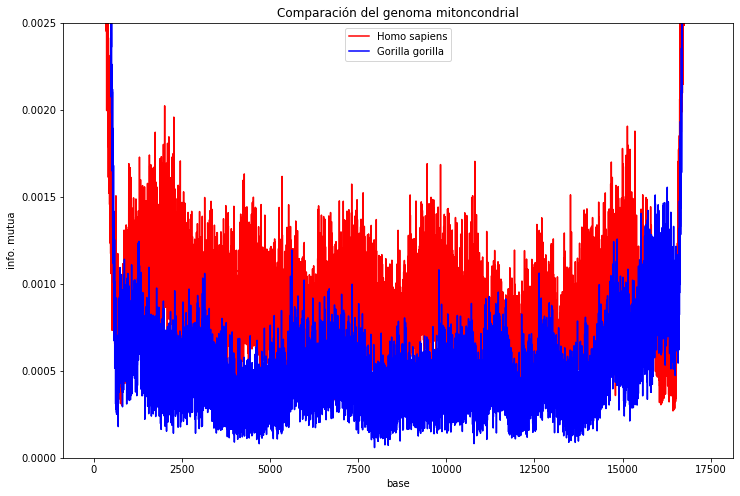

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(homo, color='r', label='Homo sapiens')
plt.plot(gor, color='b', label='Gorilla gorilla')
plt.xlabel('base')
plt.ylabel('info. mutua')
plt.title('Comparación del genoma mitoncondrial')
#plt.xlim([0, 1]) 
plt.ylim([0, 0.0025])
plt.legend()
plt.show()

### Humano vs. hurón

In [ ]:
humano1, huron = lectura('homo_vs_mustela')

In [ ]:
lista = [humano1, huron]
correlacion = list([mi(x,y,2) for x in lista for y in lista])
entro = list([entropia(x, 2) for x in lista])

In [ ]:
d = {'Humano': correlacion[0:2], 'Hurón': correlacion[2:4]}
df = pd.DataFrame(data=d, index = ['Humano', 'Hurón'])
for i in range(len(entro)):
    df.iat[i,i] = entro[i] 

#### Tabla de correlaciones

In [ ]:
df

,Humano,Hurón
Humano,25.019634,31.369896
Hurón,31.369896,10.763415


#### Gráfica de información mutua

In [ ]:
homo1 = graf_Mutua(humano1)
hur = graf_Mutua(huron)

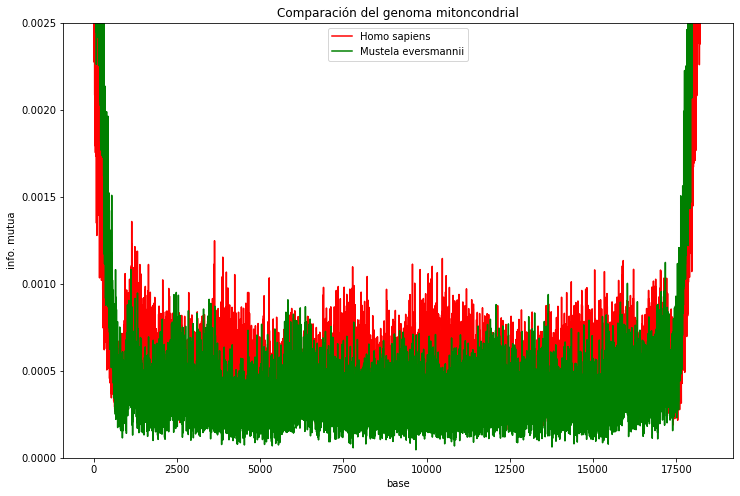

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(homo1, color='r', label='Homo sapiens')
plt.plot(hur, color='g', label='Mustela eversmannii')
plt.xlabel('base')
plt.ylabel('info. mutua')
plt.title('Comparación del genoma mitoncondrial')
#plt.xlim([0, 1]) 
plt.ylim([0, 0.0025])
plt.legend()
plt.show()

### Humano vs. chimpancé

In [ ]:
humano2, chimp = lectura('homo_vs_pan')

In [ ]:
lista = [humano2, chimp]
correlacion = list([mi(x,y,2) for x in lista for y in lista])
entro = list([entropia(x, 2) for x in lista])

In [ ]:
d = {'Humano': correlacion[0:2], 'Chimpancé': correlacion[2:4]}
df = pd.DataFrame(data=d, index = ['Humano', 'Chimpancé'])
for i in range(len(entro)):
    df.iat[i,i] = entro[i] 

#### Tabla de correlaciones

In [ ]:
df

,Humano,Chimpancé
Humano,25.761513,33.250145
Chimpancé,33.250145,11.691745


#### Gráfica de información mutua

In [ ]:
homo2 = graf_Mutua(humano2)
chi = graf_Mutua(chimp)

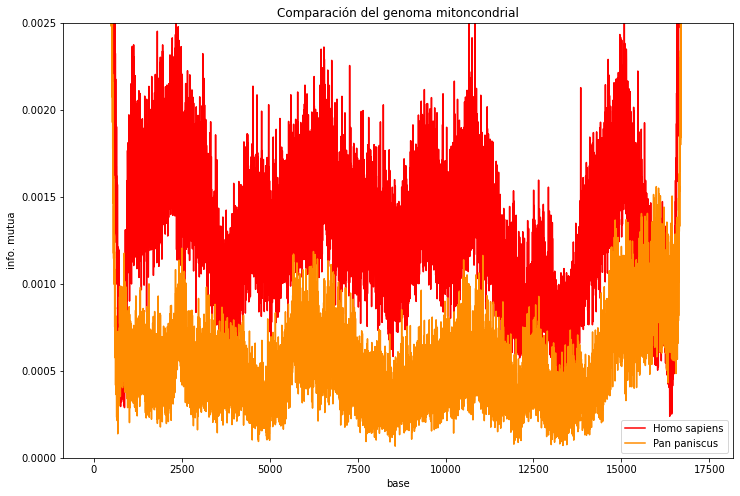

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(homo2, color='r', label='Homo sapiens')
plt.plot(chi, color='darkorange', label='Pan paniscus')
plt.xlabel('base')
plt.ylabel('info. mutua')
plt.title('Comparación del genoma mitoncondrial')
#plt.xlim([0, 1]) 
plt.ylim([0, 0.0025])
plt.legend()
plt.show()

### Humano vs. cerdo

In [ ]:
humano3, cerdo = lectura('homo_vs_sus')

In [ ]:
lista = [humano3, cerdo]
correlacion = list([mi(x,y,2) for x in lista for y in lista])
entro = list([entropia(x, 2) for x in lista])

In [ ]:
d = {'Humano': correlacion[0:2], 'Cerdo': correlacion[2:4]}
df = pd.DataFrame(data=d, index = ['Humano', 'Cerdo'])
for i in range(len(entro)):
    df.iat[i,i] = entro[i] 

#### Tabla de correlaciones

In [ ]:
df

,Humano,Cerdo
Humano,24.995947,31.494874
Cerdo,31.494874,10.893617


In [ ]:
homo3 = graf_Mutua(humano3)
cer = graf_Mutua(cerdo)

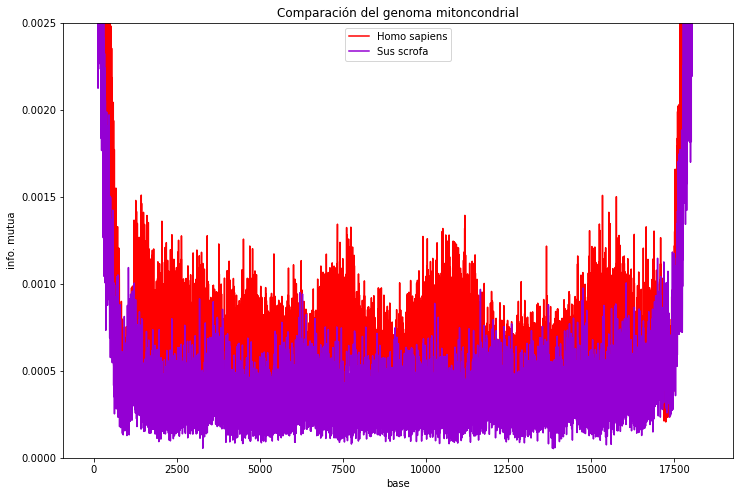

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(homo3, color='r', label='Homo sapiens')
plt.plot(cer, color='darkviolet', label='Sus scrofa')
plt.xlabel('base')
plt.ylabel('info. mutua')
plt.title('Comparación del genoma mitoncondrial')
#plt.xlim([0, 1]) 
plt.ylim([0, 0.0025])
plt.legend()
plt.show()